# Import Basic Libraries
Import necessary libraries such as NumPy, pandas, Matplotlib, Seaborn, Plotly, and scikit-learn.

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive visualizations
from plotly.offline import init_notebook_mode, iplot  # For initializing Plotly in Jupyter Notebook
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For ensemble models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score  # For evaluation metrics
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Initialize Plotly for offline mode
init_notebook_mode(connected=True)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load and Explore Data
Load the dataset, display basic information, check for null values, and describe the data.

In [9]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
data.info()

# Check for null values in the dataset
print(data.isnull().sum())

# Display statistical summary of the dataset
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Visualize Data
Create visualizations such as count plots, histograms, scatter plots, and box plots to understand the data distribution and relationships.

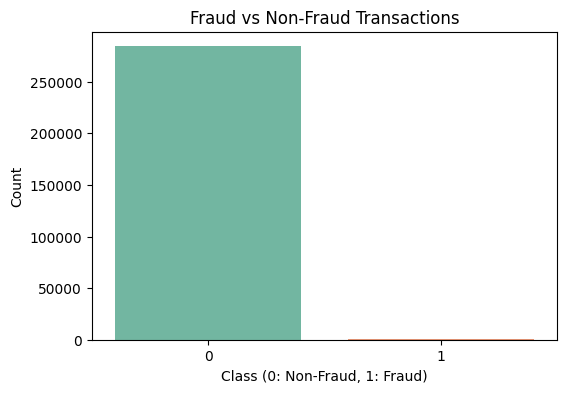

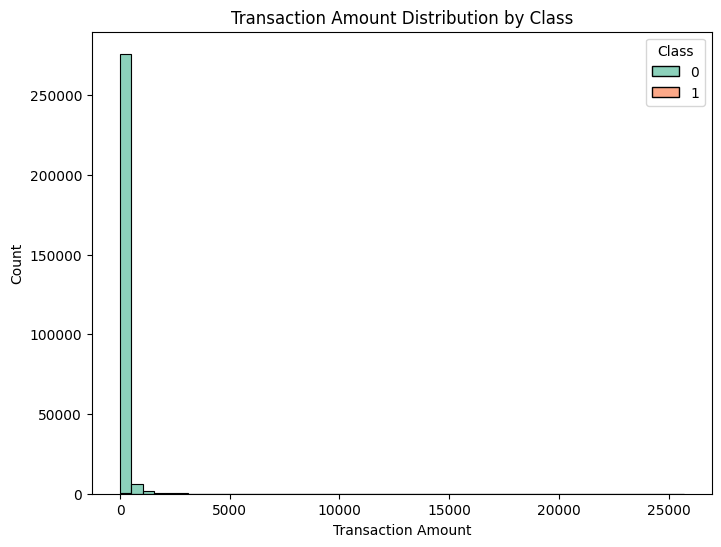

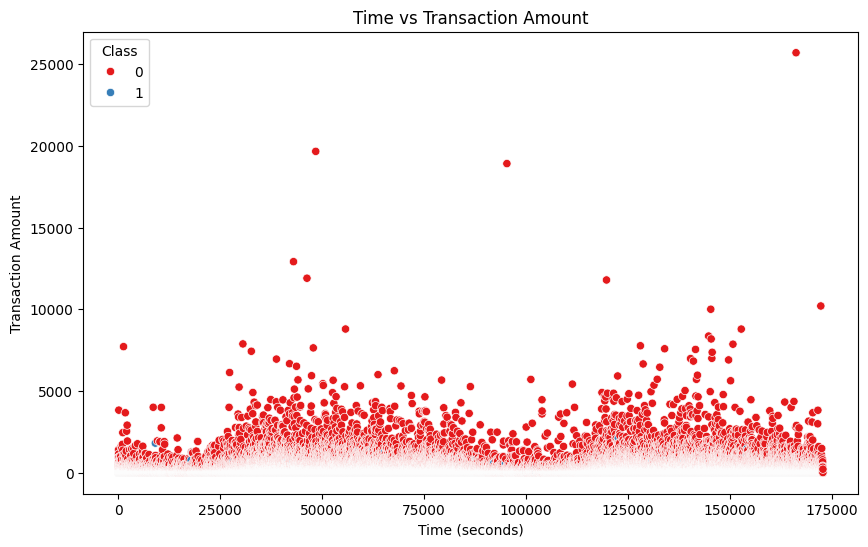

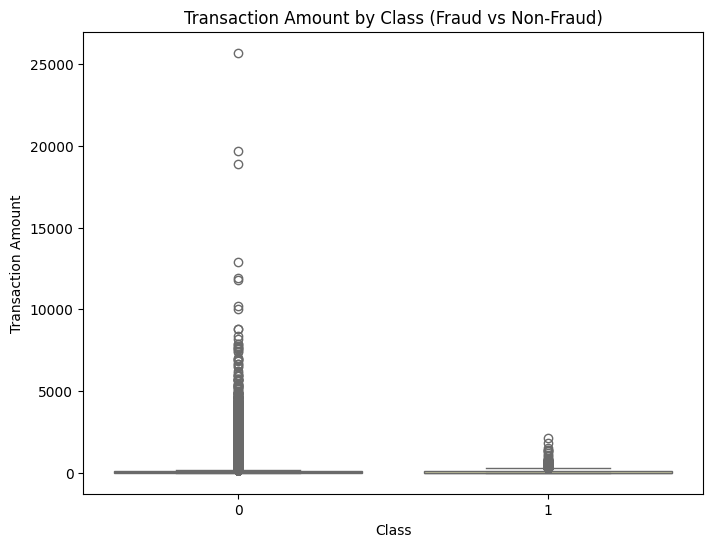

In [10]:
# Count plot for fraud vs non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Histogram for transaction amount distribution by class
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Amount', hue='Class', multiple='stack', palette='Set2', bins=50)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# Scatter plot for time vs transaction amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

# Box plot for transaction amount by class
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

# Scatter plot for fraud transactions over time using Plotly


# Data Preprocessing
Balance the dataset by undersampling the majority class, create a new dataset, and split it into features (X) and target (Y).

In [11]:
# Count the number of fraud and non-fraud transactions
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

# Undersample the majority class (non-fraud transactions)
legit_sample = legit.sample(n=len(fraud), random_state=42)

# Combine the undersampled majority class with the minority class
new_dataset = pd.concat([legit_sample, fraud], axis=0)

# Shuffle the new dataset to ensure randomness
new_dataset = new_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the new dataset into features (X) and target (Y)
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

# Model Creation and Training
Split the data into training and testing sets, train a Logistic Regression model, and make predictions.

In [12]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

# Print accuracy on the training data
print('Accuracy on Training Data:', training_data_accuracy)

# Make predictions on the testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Print accuracy on the testing data
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Training Data: 0.9390088945362135
Accuracy on Test Data: 0.934010152284264


# Evaluate Model Performance
Evaluate the model's accuracy on both training and test data using accuracy_score.

In [13]:
# Evaluate the model's accuracy on training data
training_data_accuracy = accuracy_score(Y_train, model.predict(X_train))
print('Accuracy on Training Data:', training_data_accuracy)

# Evaluate the model's accuracy on test data
test_data_accuracy = accuracy_score(Y_test, model.predict(X_test))
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Training Data: 0.9390088945362135
Accuracy on Test Data: 0.934010152284264


In [14]:
# Feature Engineering: Create meaningful features
# Example: Normalize the 'Amount' column
data['Normalized_Amount'] = (data['Amount'] - data['Amount'].mean()) / data['Amount'].std()

# Drop unnecessary columns
data = data.drop(columns=['Time', 'Amount'])

# Explanation:
# The 'Time' column may not be directly useful for classification, and 'Amount' is replaced with its normalized version.

# Separate features (X) and target (y)
X = data.drop(columns='Class')
y = data['Class']

# Address class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Explanation:
# SMOTE generates synthetic samples for the minority class (fraudulent transactions) to balance the dataset.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train and evaluate multiple models

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, logistic_pred))
print("Accuracy:", accuracy_score(y_test, logistic_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, logistic_pred))

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=20,n_estimators=50, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classifier:")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_pred))

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=20, n_estimators=50, learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_pred))
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, gb_pred))

# Visualize confusion matrices for all models
models = {
    'Logistic Regression': logistic_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gb_pred
}

for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     56863
           1       0.97      0.90      0.93     28432

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295

Accuracy: 0.9574066475174394
ROC-AUC Score: 0.9421777211027331


KeyboardInterrupt: 